# Week14: Autoencoder, GAN, Q-learning

- **Student ID** : 2022113170
- **Name** : 장정의

# 1. Autoencoder 

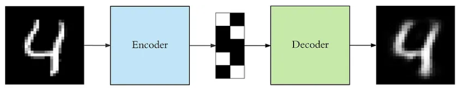

In [1]:
!pip install numpy

In [2]:
!pip install gym==0.20.0
!pip install pyglet==1.5.27

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

### Load MNIST dataset

In [2]:
# load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

In [3]:
X_train.shape

(60000, 28, 28)

### Build the autoencoder model using Keras

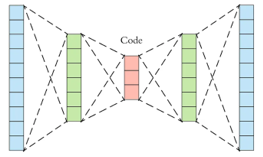

In [4]:
# build encoder with flatten input, 1 dense layer with 100 outputs, 1 dense layer with 30 outputs, with relu activation
# build decoder with 1 dense layer with 100 outputs with relu activation, 1 dense layer with 28*28 outputs with sigmoid activation
stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(30,activation="relu"),
])

stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=[30]),
    keras.layers.Dense(28*28, activation = "sigmoid"),
    keras.layers.Reshape([28, 28])
])

# build stacked autoencoder with encoder and decoder

stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])

2024-06-07 00:14:01.013322: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-07 00:14:03.430515: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 19886 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:18:00.0, compute capability: 8.6
2024-06-07 00:14:03.431236: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 22294 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:3b:00.0, compute capability: 8.6
2024-06-07 00:14:03.431792: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0

In [5]:
# display the model. set expand_nested=True
stacked_ae.summary(expand_nested=True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 30)                81530     
|¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯|
| flatten (Flatten)         (None, 784)               0         |
|                                                               |
| dense (Dense)             (None, 100)               78500     |
|                                                               |
| dense_1 (Dense)           (None, 30)                3030      |
¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯
 sequential_1 (Sequential)   (None, 28, 28)            82284     
|¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯|
| dense_2 (Dense)           (None, 100)               3100      |
|                                                               |
| dense_3 (Dense)           (None, 784)               

### Compile and Train the model

In [6]:
# compile the model with SGD optimizer with learning rate 1.0, and binary_crossentropy loss
stacked_ae.compile(
    loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0)
)

In [7]:
# train the model. 10 epochs. record history
history = stacked_ae.fit(X_train, X_train, epochs=10)

Epoch 1/10
  58/1875 [..............................] - ETA: 4s - loss: 0.5386 

2024-06-07 00:14:36.826220: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1875/1875 [==============================] - 6s 3ms/step - loss: 0.2126
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1434
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1252
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1151
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1092
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1056
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1030
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1010
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0993
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0978


### Check encoding and decoding results

In [8]:
def plot_image(image):
    plt.imshow(image, cmap="Greys")

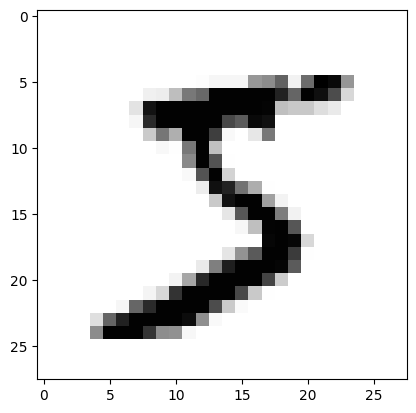

In [9]:
# show test image
plot_image(X_train[0])

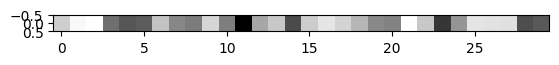

In [10]:
# show the encoded image
compressed_image = stacked_encoder.predict(X_train[0].reshape(1,28,28))
plot_image(compressed_image)

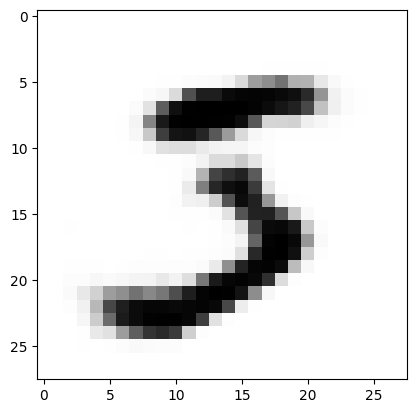

In [11]:
# show the image reconstructed from the encoded data
reconstructed_image = stacked_decoder.predict(compressed_image)
plot_image(reconstructed_image.reshape(28, 28))

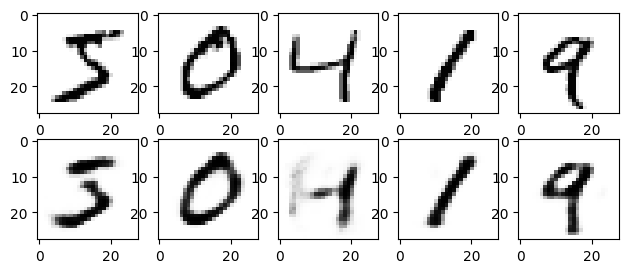

In [12]:
# show N original and reconstructed image examples
def show_reconstructions(model, images=X_train, n_images=5):
    reconstructions = model.predict(images[:n_images])

    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plt.imshow(images[image_index], cmap="Greys")
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plt.imshow(reconstructions[image_index], cmap="Greys")

show_reconstructions(stacked_ae, X_train[:10], 5)

### Plot the encoded data using t-SNE

In [13]:
from sklearn.manifold import TSNE

# get encoded data of first 200 training images
X_test_compressed = stacked_encoder.predict(X_test[:200])

# projection to 2D using t-SNE
tsne = TSNE()
X_test_2D = tsne.fit_transform(X_test_compressed)

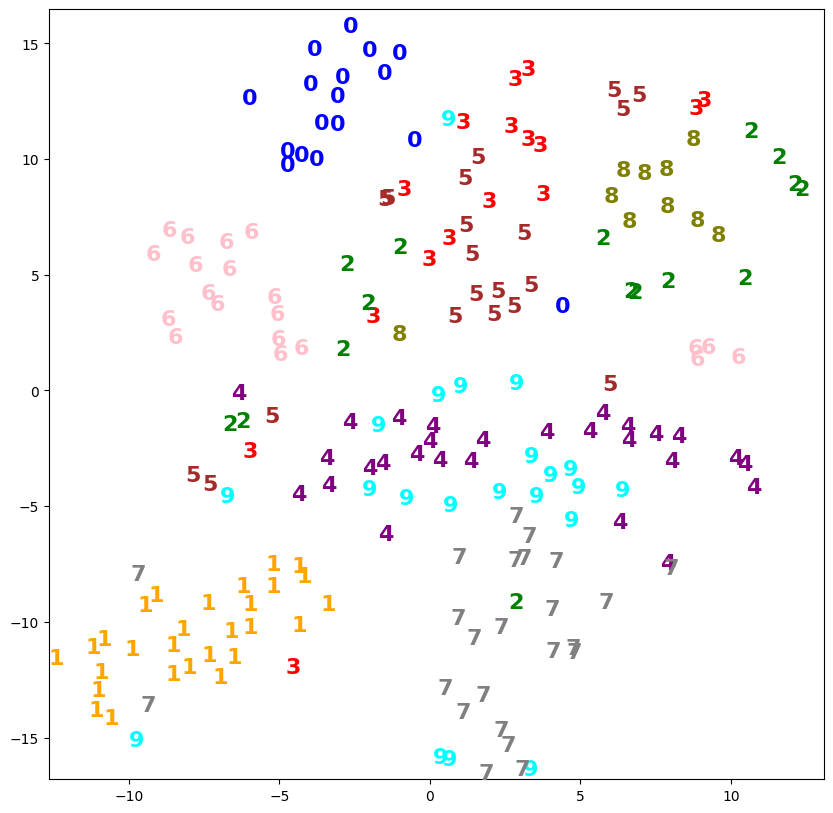

In [14]:
# plot the 200 encoded data with different colors
colors = ["blue", "orange", "green", "red", "purple",
          "brown", "pink", "gray", "olive","cyan"]

plt.figure(figsize=(10,10))
plt.xlim(X_test_2D[:,0].min(), X_test_2D[:,0].max()+1)
plt.ylim(X_test_2D[:,1].min(), X_test_2D[:,1].max()+1)

for i in range(len(X_train[:200])):
    plt.text(X_test_2D[i, 0], X_test_2D[i, 1], str(y_test[i]),
            color = colors[y_test[i]],
            fontdict = {'weight':'bold','size':16})

---

# 2. GAN (Generative Adversarial Network)

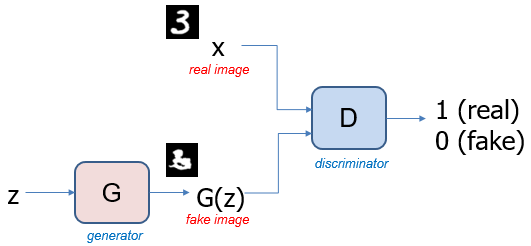
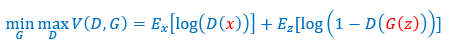

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import initializers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import BatchNormalization, Dense, LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

### Get the MNIST data (real)

In [16]:
# load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [17]:
# use 10000 data
X_train = X_train[:10000]
y_train = y_train[:10000]

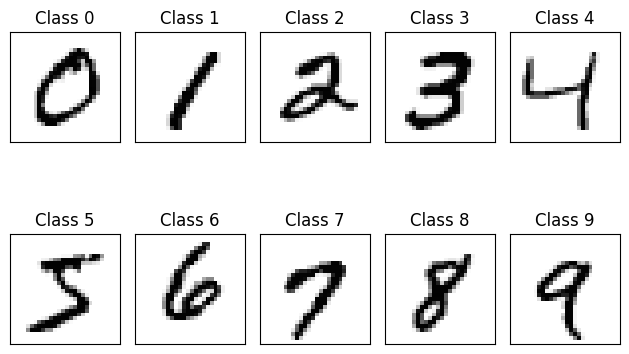

In [18]:
# show sample images for each class
fig = plt.figure()
for i in range(10):
    plt.subplot(2, 5, i+1)
    x_y = X_train[y_train == i]
    plt.imshow(x_y[0], cmap='Greys', interpolation='none')
    plt.title("Class %d" % (i))
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()

### Reshaping and Normalizing Inputs

In [19]:
print('X_train shape', X_train.shape)

# reshaping the inputs
X_train = X_train.reshape(-1, 28*28)

# normalizing the inputs (-1, 1)
X_train = (X_train.astype('float32') / 255 - 0.5) * 2

print('X_train reshape:', X_train.shape)

X_train shape (10000, 28, 28)
X_train reshape: (10000, 784)


### Build the model - Generator

In [20]:
# latent space dimension
latent_dim = 100

# imagem dimension 28x28
img_dim = 784

init = initializers.RandomNormal(stddev=0.02)

# Generator network
generator = Sequential()

# Input layer and hidden layer 1
generator.add(Dense(128, input_shape=(latent_dim,), kernel_initializer=init))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))

# Hidden layer 2
generator.add(Dense(256))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))

# Hidden layer 3
generator.add(Dense(512))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))

# Output layer
generator.add(Dense(img_dim, activation='tanh'))

In [21]:
# prints a summary representation of your model
generator.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               12928     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128)               0         
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 256)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                      

### Build the model - Discriminator

In [22]:
# Discriminator network
discriminator = Sequential()

# Input layer and hidden layer 1
discriminator.add(Dense(512, input_shape=(img_dim,), kernel_initializer=init))
discriminator.add(LeakyReLU(alpha=0.2))

# Hidden layer 2
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(alpha=0.2))

# Hidden layer 3
discriminator.add(Dense(512))
discriminator.add(LeakyReLU(alpha=0.2))

# Output layer
discriminator.add(Dense(1, activation='sigmoid'))

In [23]:
# prints a summary representation of your model
discriminator.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 512)               131584    
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                

In [24]:
# compile discriminator with Adam optimizer
optimizer = Adam(learning_rate=0.0002, beta_1=0.5)

discriminator.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

###  Combine Generator and Discriminator to GAN

In [25]:
# build GAN model
discriminator.trainable = False

d_g = Sequential()
d_g.add(generator)
d_g.add(discriminator)

In [26]:
# prints a summary representation of your model
d_g.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 784)               583312    
                                                                 
 sequential_4 (Sequential)   (None, 1)                 665345    
                                                                 
Total params: 1,248,657
Trainable params: 581,520
Non-trainable params: 667,137
_________________________________________________________________


In [27]:
# compile GAN model
d_g.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

### Train the GAN model
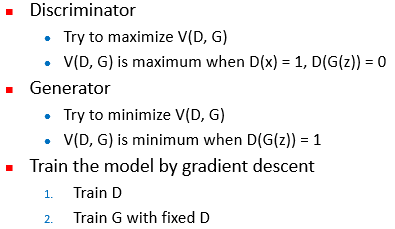

epoch = 1/20, d_loss=0.023, g_loss=4.439                                                                                                                        


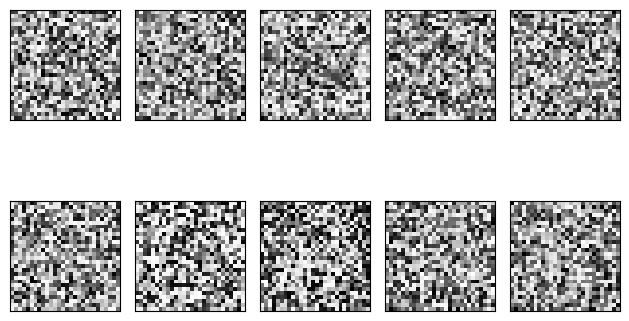

epoch = 2/20, d_loss=0.006, g_loss=7.015                                                                                                                        


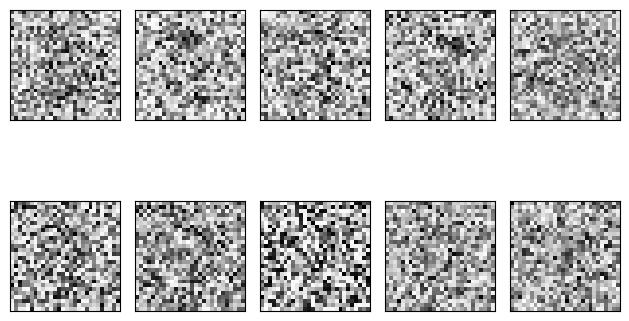

epoch = 3/20, d_loss=0.463, g_loss=0.921                                                                                                                        


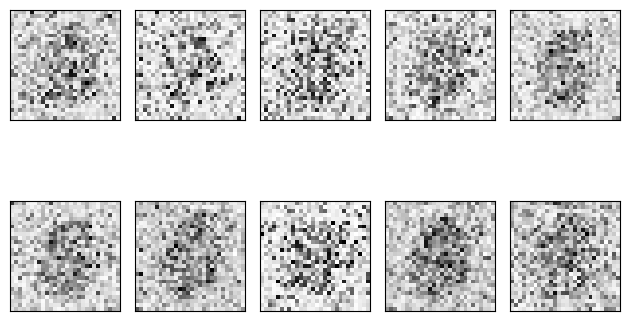

epoch = 4/20, d_loss=0.629, g_loss=0.905                                                                                                                        


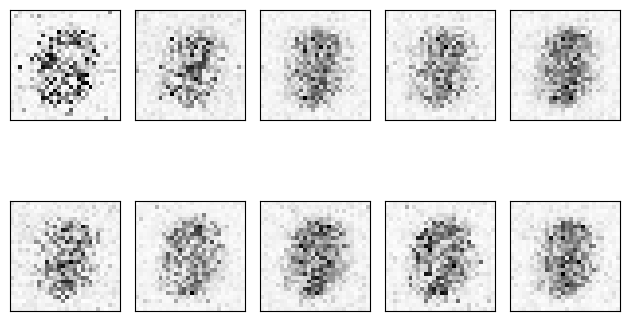

epoch = 5/20, d_loss=0.640, g_loss=1.023                                                                                                                        


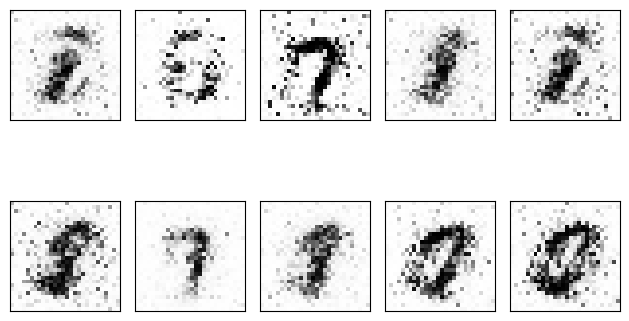

epoch = 6/20, d_loss=0.494, g_loss=2.770                                                                                                                        


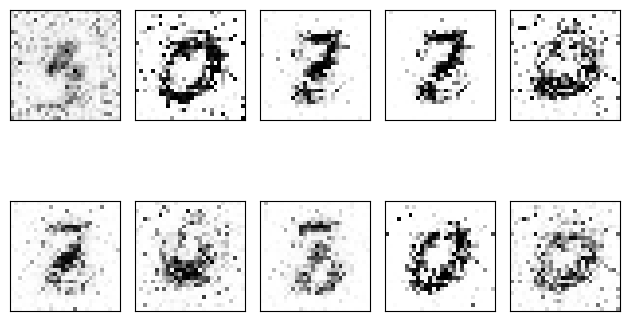

epoch = 7/20, d_loss=0.367, g_loss=3.192                                                                                                                        


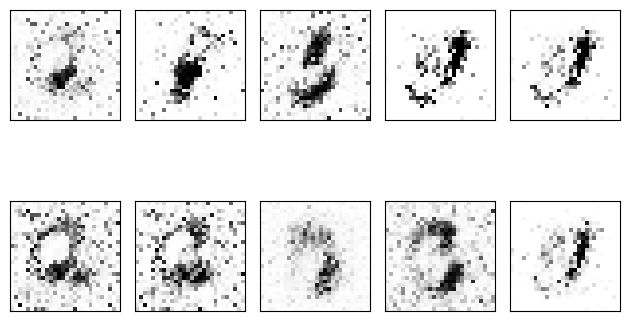

epoch = 8/20, d_loss=0.354, g_loss=2.387                                                                                                                        


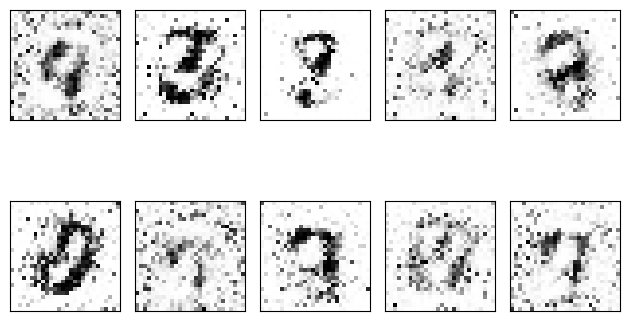

epoch = 9/20, d_loss=0.284, g_loss=3.178                                                                                                                        


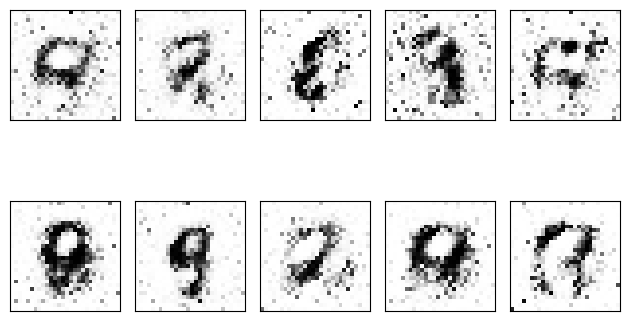

epoch = 10/20, d_loss=0.446, g_loss=2.603                                                                                                                        


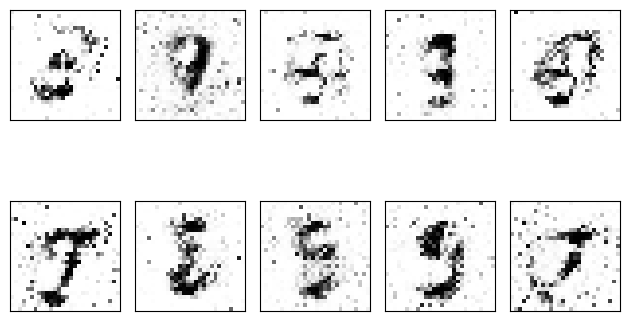

epoch = 11/20, d_loss=0.278, g_loss=2.980                                                                                                                        


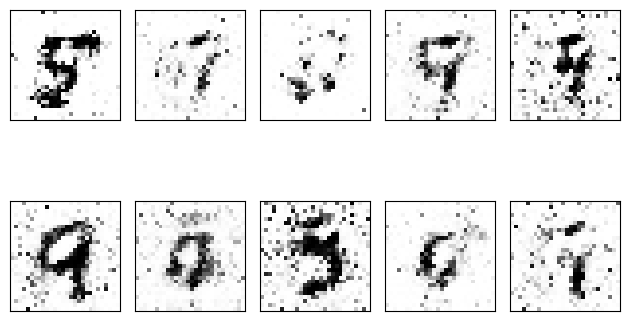

epoch = 12/20, d_loss=0.356, g_loss=3.471                                                                                                                        


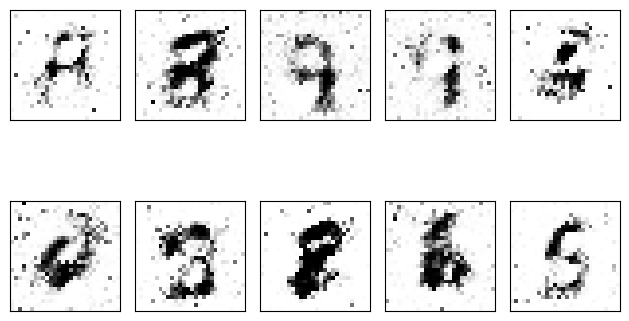

epoch = 13/20, d_loss=0.345, g_loss=2.992                                                                                                                        


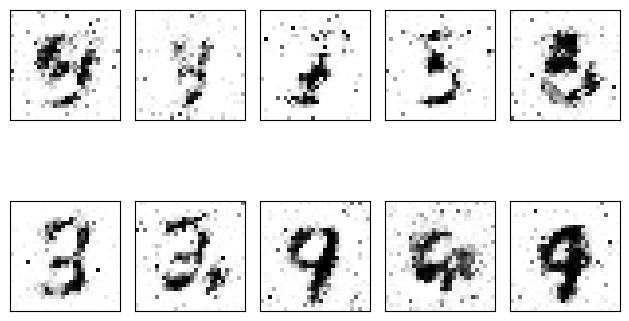

epoch = 14/20, d_loss=0.334, g_loss=3.256                                                                                                                        


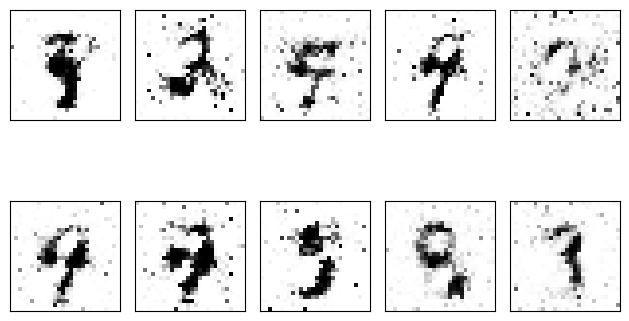

epoch = 15/20, d_loss=0.223, g_loss=2.918                                                                                                                        


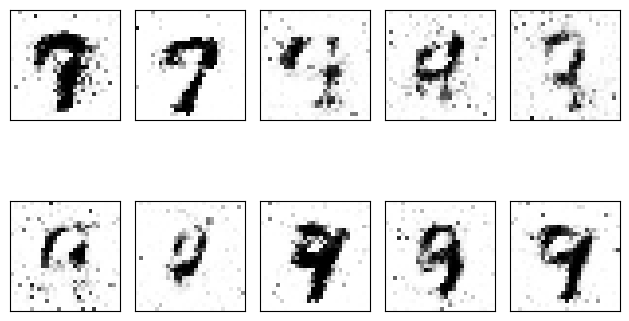

epoch = 16/20, d_loss=0.243, g_loss=3.083                                                                                                                        


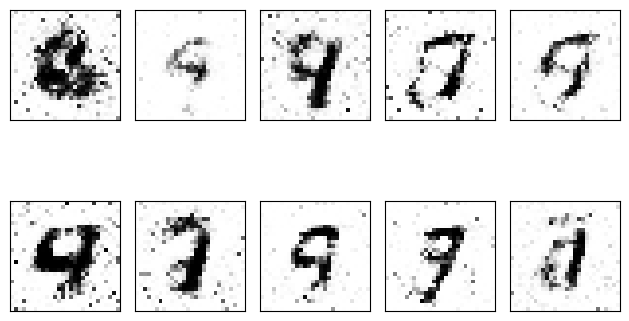

epoch = 17/20, d_loss=0.326, g_loss=2.861                                                                                                                        


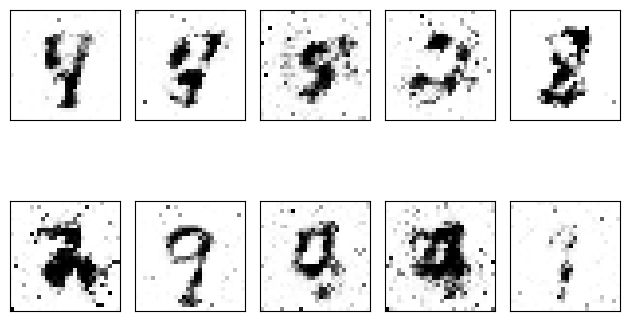

epoch = 18/20, d_loss=0.392, g_loss=2.742                                                                                                                        


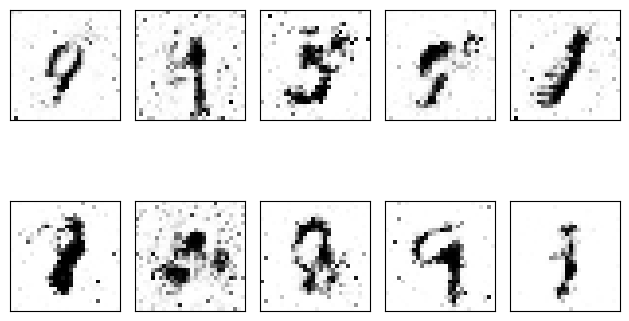

epoch = 19/20, d_loss=0.391, g_loss=2.914                                                                                                                        


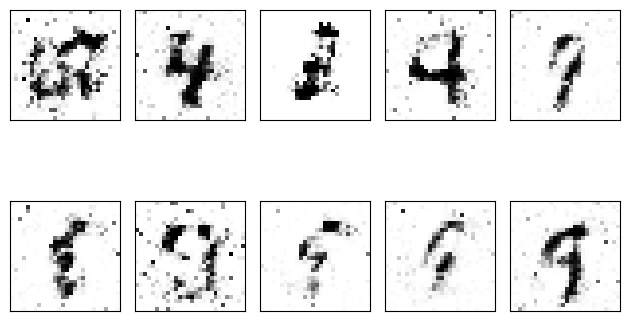

epoch = 20/20, d_loss=0.370, g_loss=2.678                                                                                                                        


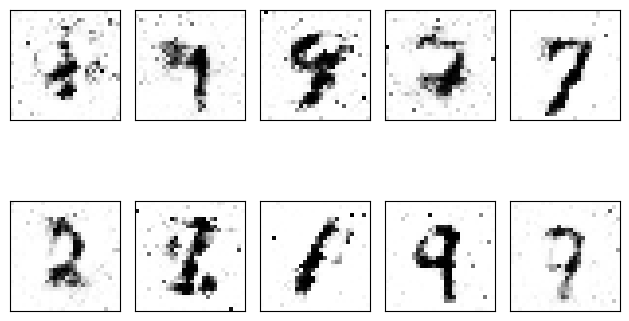

In [28]:
epochs = 20
batch_size = 64

real = np.ones(shape=(batch_size, 1))
fake = np.zeros(shape=(batch_size, 1))

d_loss = []
d_g_loss = []


for e in range(epochs):
    for i in range(len(X_train) // batch_size):

        ###############################################################
        # Train Discriminator weights
        discriminator.trainable = True

        # Real samples
        X_batch = X_train[i * batch_size : (i + 1) * batch_size]
        d_loss_real = discriminator.train_on_batch(x=X_batch, y=real)

        # Fake Samples
        z = np.random.normal(loc=0, scale=1, size=(batch_size, latent_dim))
        X_fake = generator.predict_on_batch(z)
        d_loss_fake = discriminator.train_on_batch(x=X_fake, y=fake)

        # Discriminator loss
        d_loss_batch = 0.5 * (d_loss_real[0] + d_loss_fake[0])

        ###############################################################
        # Train Generator weights
        discriminator.trainable = False

        # Recreate the optimizer instance
        optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
        # Compile the GAN model with the new optimizer
        d_g.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

        # Train the GAN model
        d_g_loss_batch = d_g.train_on_batch(x=z, y=real)

        # Show learning process
        print(
            "epoch = %d/%d, batch = %d/%d, d_loss=%.3f, d_g_loss=%.3f"
            % (e + 1, epochs, i, len(X_train) // batch_size,
                d_loss_batch, d_g_loss_batch[0],
            ),
            100 * " ",
            end="\r",
        )

    d_loss.append(d_loss_batch)
    d_g_loss.append(d_g_loss_batch[0])
    print(
        "epoch = %d/%d, d_loss=%.3f, g_loss=%.3f"
        % (e + 1, epochs, d_loss[-1], d_g_loss[-1]),
        100 * " ",
    )

    # show sample generation after each epoch
    samples = 10
    x_fake = generator.predict(np.random.normal(loc=0, scale=1, size=(samples, latent_dim)))

    for k in range(samples):
        plt.subplot(2, 5, k + 1)
        plt.imshow(x_fake[k].reshape(28, 28), cmap="Greys")
        plt.xticks([])
        plt.yticks([])

    plt.tight_layout()
    plt.show()


### Evaluate the GAN model

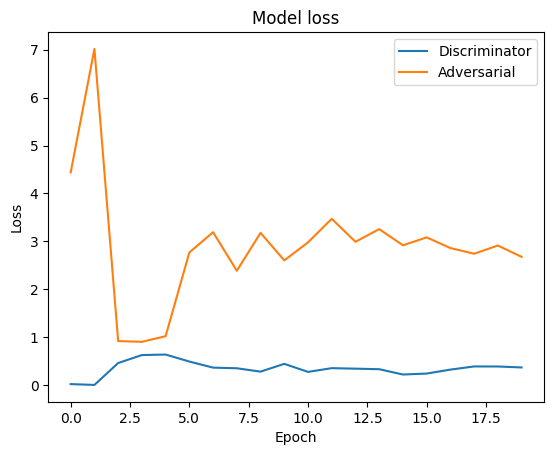

In [29]:
# plotting the metrics
plt.plot(d_loss)
plt.plot(d_g_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Discriminator', 'Adversarial'], loc='upper right')
plt.show()

### Load trained generator
*NOTE: load model from generator.h5 to avoid long training times*

In [30]:
generator = tf.keras.models.load_model('generator.h5')

### Generate number-like fake images

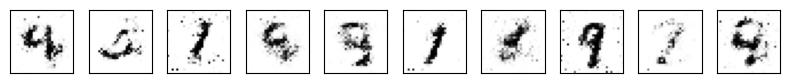

In [33]:
# Generate number-like images using trained generator
samples = 10
x_fake = generator.predict(np.random.normal(loc=0, scale=1, size=(samples, latent_dim)))
 
plt.figure(figsize=(8,8))
for k in range(samples):
        plt.subplot(1, 10, k + 1)
        plt.imshow(x_fake[k].reshape(28, 28), cmap="Greys")
        plt.xticks([])
        plt.yticks([])

plt.tight_layout()
plt.show()

---

# 3. Q-Learning 
- On given GridWorldEnv
- It provides
  - env.step(action) : returns (next state, reward, terminated, info)

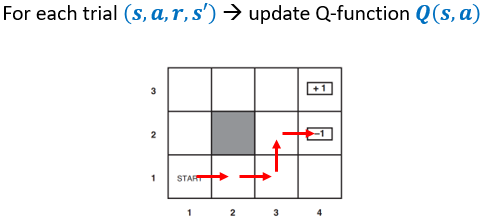

### The agent

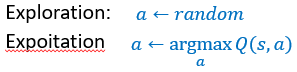

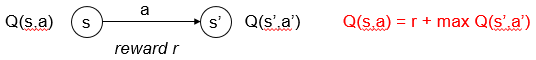
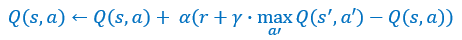

In [2]:
from collections import defaultdict
import numpy as np

class Agent(object):

    def __init__(self, env, learning_rate=0.01, discount_factor=0.9, epsilon_greedy=0.9):
        self.env = env
        self.lr = learning_rate
        self.gamma = discount_factor
        self.epsilon = epsilon_greedy

        # define the q_table
        self.q_table = defaultdict(lambda: np.zeros(self.env.nA))

    # choose action according to the Q values
    def choose_action(self, state):
        
        # exploration - choose random action
        if np.random.uniform() < self.epsilon:
            action = np.random.choice(self.env.nA)
            
        # exploitation - choose action with max Q value
        else:
            q_vals = self.q_table[state]
            actions = np.random.permutation(self.env.nA)
            q_vals = [q_vals[a] for a in actions]
            q_argmax = np.argmax(q_vals)
            action = actions[q_argmax]
        return action

    # update Q values from experience (s, a, r, s')
    def _learn(self, transition):
        s, a, r, next_s, done = transition
        q_val = self.q_table[s][a]
        if done:
            q_target = r
        else:
            q_target = r + self.gamma * np.max(self.q_table[next_s])

        # Update the q_table
        self.q_table[s][a] += self.lr * (q_target - q_val)

### Q-learning on grid world

In [3]:
from gridworld_env import GridWorldEnv
from collections import namedtuple
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
Transition = namedtuple(
    'Transition', ('state', 'action', 'reward', 'next_state', 'done'))

# Perform Q learning for given number of episodes
def run_qlearning(agent, env, num_episodes=100):
    
    history = []
    for episode in range(num_episodes+1):
        state = env.reset()
        env.render(mode='human')
        
        final_reward, n_moves = 0.0, 0
        while True:
            
            # choose next action at current state (exploitation or exploration)
            action = agent.choose_action(state)
            
            # result of the action - next state and reward
            next_s, reward, done, _ = env.step(action)
            
            # Q learning from (s, a, r, s')
            agent._learn(Transition(state, action, reward, next_s, done))
            
            env.render(mode='human', done=done)
            state = next_s
            n_moves += 1
            if done:
                break
                
            final_reward = reward
            
        history.append((n_moves, final_reward))
        print('Episode %d: Reward %.1f #Moves %d' % (episode, final_reward, n_moves))

    return history

In [4]:
env = GridWorldEnv(num_rows=5, num_cols=6)
agent = Agent(env, learning_rate=1.0, epsilon_greedy=0.0)

history = run_qlearning(agent, env, num_episodes=30)
env.close()

Episode 0: Reward -1.0 #Moves 7
Episode 1: Reward -1.0 #Moves 19
Episode 2: Reward 1.0 #Moves 47
Episode 3: Reward -1.0 #Moves 16
Episode 4: Reward -1.0 #Moves 19
Episode 5: Reward 1.0 #Moves 54
Episode 6: Reward -1.0 #Moves 220
Episode 7: Reward -1.0 #Moves 136
Episode 8: Reward -1.0 #Moves 45
Episode 9: Reward 1.0 #Moves 196
Episode 10: Reward 1.0 #Moves 34
Episode 11: Reward 1.0 #Moves 66
Episode 12: Reward 1.0 #Moves 23
Episode 13: Reward 1.0 #Moves 224
Episode 14: Reward 1.0 #Moves 28
Episode 15: Reward 1.0 #Moves 49
Episode 16: Reward 1.0 #Moves 26
Episode 17: Reward 1.0 #Moves 17
Episode 18: Reward 1.0 #Moves 14
Episode 19: Reward 1.0 #Moves 9
Episode 20: Reward 1.0 #Moves 9
Episode 21: Reward 1.0 #Moves 9
Episode 22: Reward 1.0 #Moves 9
Episode 23: Reward 1.0 #Moves 9
Episode 24: Reward 1.0 #Moves 9
Episode 25: Reward 1.0 #Moves 9
Episode 26: Reward 1.0 #Moves 9
Episode 27: Reward 1.0 #Moves 9
Episode 28: Reward 1.0 #Moves 9
Episode 29: Reward 1.0 #Moves 9
Episode 30: Reward 1.

### Plot the learning history

In [5]:
def plot_learning_history(history):
    fig = plt.figure(1, figsize=(14, 10))
    
    ax = fig.add_subplot(2, 1, 1)
    episodes = np.arange(len(history))
    
    moves = np.array([h[0] for h in history])
    plt.plot(episodes, moves, lw=4 ,marker='o', markersize=10)
    
    ax.tick_params(axis='both', which='major', labelsize=15)
    plt.xlabel('Episodes', size=20)
    plt.ylabel('# moves', size=20)

    ax = fig.add_subplot(2, 1, 2)
    
    rewards = np.array([h[1] for h in history])
    plt.step(episodes, rewards, lw=4)
    
    ax.tick_params(axis='both', which='major', labelsize=15)
    plt.xlabel('Episodes', size=20)
    plt.ylabel('Final rewards', size=20)
    plt.savefig('q-learning-history.png', dpi=300)
    plt.show()

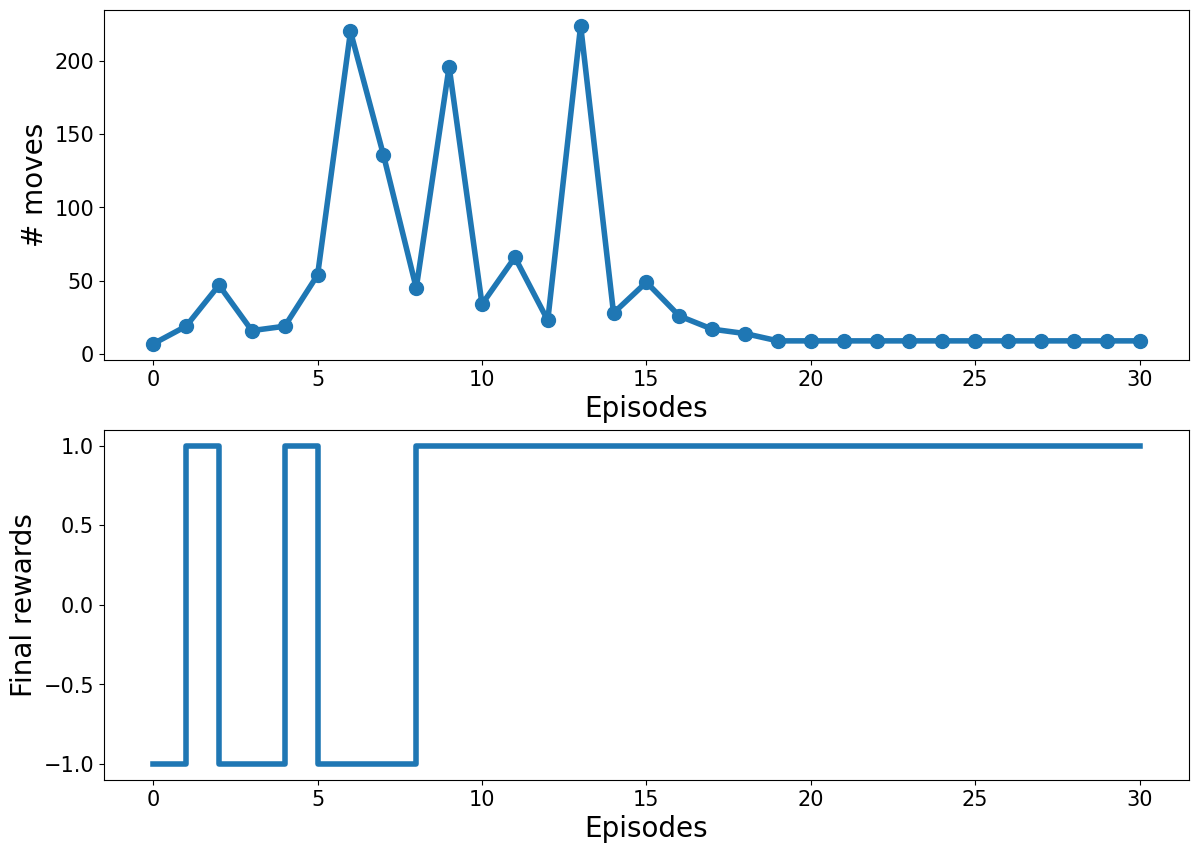

In [6]:
plot_learning_history(history)

---

# Quiz 1: Encoding Fashion Images 
- Dataset : Fashion MNIST
- To do
  0. Load the dataset
  1. Build the autoencoder model
  2. Train the model
  3. Show example original and decoded images
  2. Plot the encoded data using t-SNE

In [7]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

### Load Fashion MNIST dataset

In [8]:
# load dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

### Build the autoencoder model

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the encoder
stacked_encoder = keras.Sequential([
    layers.Flatten(input_shape=[28, 28]),
    layers.Dense(30, activation="relu")
])

# Define the decoder
stacked_decoder = keras.Sequential([
    layers.Dense(28*28, activation="sigmoid", input_shape=[30]),
    layers.Reshape([28, 28])
])

# Define the stacked autoencoder model
stacked_ae = keras.Model(inputs=autoencoder_input, outputs=decoded_output)

# Display the model summary
stacked_ae.summary(expand_nested=True)


Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)          │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_17 (Sequential)           │ (None, 30)                  │          23,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ flatten_6 (Flatten)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ dense_12 (Dense)                │ (None, 30)                  │          23,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_18 (Sequential)           │ (None, 28, 28)              │          24,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ dense_13 (Dense)                │ (None, 784)                 │          24,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ reshape_6 (Reshape)             │ (None, 28, 28)              │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,854 (186.93 KB)

 Trainable params: 47,854 (186.93 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# build encoder with flatten input, 1 dense layer with 30 outputs, with relu activation
# build decoder with 1 dense layer with 28*28 outputs with sigmoid activation, and reshape

stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(30, activation="relu")
])

stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(28*28, activation = "sigmoid", input_shape=[30]),
    keras.layers.Reshape([28, 28])
])

# build stacked autoencoder with encoder and decoder 
stacked_ae = keras.Sequential([
    keras.Input(shape=[28, 28]),
    stacked_encoder,
    stacked_decoder
])

# display the model
stacked_ae.summary(expand_nested=True)

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_24 (Sequential)           │ (None, 30)                  │          23,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ flatten_9 (Flatten)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ dense_18 (Dense)                │ (None, 30)                  │          23,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_25 (Sequential)           │ (None, 28, 28)              │          24,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ dense_19 (Dense)                │ (None, 784)                 │          24,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│    └ reshape_9 (Reshape)             │ (None, 28, 28)              │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,854 (186.93 KB)

 Trainable params: 47,854 (186.93 KB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [20]:
# compile the model with SGD optimizer with learning rate 1.0, and binary_crossentropy loss
stacked_ae.compile(
    loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0)
)

# train the model. 10 epochs. record history
history = stacked_ae.fit(X_train, X_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.4563
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.3264
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.3119
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3058
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3021
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2989
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2974
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2949
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2932
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2924


### Show 5 original and reconstructed image examples

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


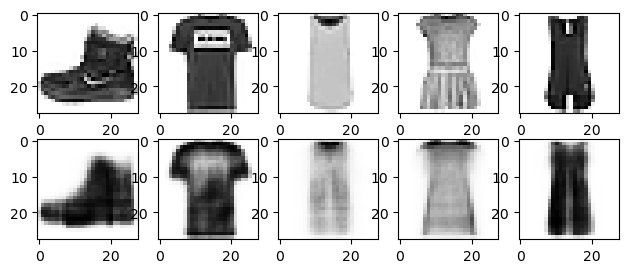

In [27]:
def show_reconstructions(model, images=X_train, n_images=5):
    reconstructions = model.predict(images[:n_images])
    
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plt.imshow(images[image_index], cmap="Greys")
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plt.imshow(reconstructions[image_index], cmap="Greys")
        
show_reconstructions(stacked_ae)

### Plot the encoded data using t-SNE

In [39]:
from sklearn.manifold import TSNE

X_test_compressed = stacked_encoder.predict(X_test[:300])

tsne = TSNE()
X_test_2D = tsne.fit_transform(X_test_compressed)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step


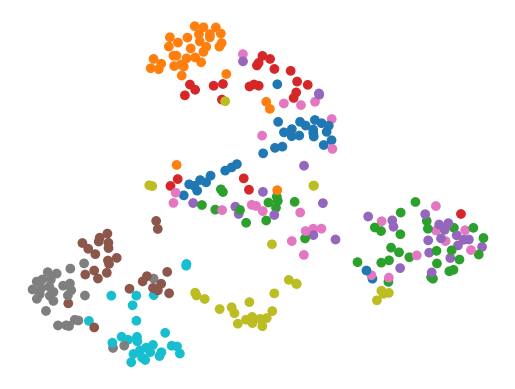

In [40]:
colors = ["blue", "orange", "green", "red", "purple",
          "brown", "pink", "gray", "olive","cyan"]

plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c = y_test[:300], cmap="tab10")
plt.axis("off")
plt.show()

---

# Quiz 2: Generating Fashion-like Fake Images using GAN 
- Use Fashion MNIST as real images
- To do
  1. Build your own GAN model
  2. Train the model
  3. Generate fashion-like fake images

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import initializers
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import BatchNormalization, Dense, LeakyReLU, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

### Get the real images (Fashion MNIST)

In [3]:
# load dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

### Reshaping and Normalizing Inputs

In [4]:
print('X_train shape', X_train.shape)

# reshaping the inputs
X_train = X_train.reshape(-1, 28*28)

# normalizing the inputs (-1, 1)
X_train = (X_train.astype('float32') / 255 - 0.5) * 2

print('X_train reshape:', X_train.shape)

X_train shape (60000, 28, 28)
X_train reshape: (60000, 784)


### Build Generator

In [5]:
# latent space dimension
latent_dim = 100

# imagem dimension 28x28
img_dim = 784

init = initializers.RandomNormal(stddev=0.02)

# Generator network
generator = Sequential()

# Input layer and hidden layer 1
generator.add(Dense(128, input_shape=(latent_dim,), kernel_initializer=init))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))

# Hidden layer 2
generator.add(Dense(256, kernel_initializer=init))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))

# Hidden layer 3
generator.add(Dense(512, kernel_initializer=init))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))

# Output layer
generator.add(Dense(img_dim, activation='tanh', kernel_initializer=init))

# prints a summary representation of your model
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               12928     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128)               0         
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 256)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                        

2024-06-07 03:19:17.491883: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-07 03:19:19.620779: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 19886 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:18:00.0, compute capability: 8.6
2024-06-07 03:19:19.621514: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 22294 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:3b:00.0, compute capability: 8.6
2024-06-07 03:19:19.622052: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0

### Build Discriminator

In [6]:
# Discriminator network
discriminator = Sequential()

discriminator.add(Dense(128, input_shape=(img_dim,), kernel_initializer=init))
discriminator.add(LeakyReLU(alpha=0.2))

# Hidden layer 2
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(alpha=0.2))

# Hidden layer 3
discriminator.add(Dense(512))
discriminator.add(LeakyReLU(alpha=0.2))

# Output layer
discriminator.add(Dense(1, activation='sigmoid'))

# prints a summary representation of your model
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               131584    
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                

### Compile Discriminator

In [7]:
# compile discriminator 
optimizer = Adam(learning_rate=0.0002, beta_1=0.5)

discriminator.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

### Build GAN

In [8]:
# build GAN model
discriminator.trainable = False

d_g = Sequential()
d_g.add(generator)
d_g.add(discriminator)

### Compile GAN

In [9]:
# compile GAN model
d_g.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

### Train GAN
- Show intermediate generation results

2024-06-07 03:21:35.594652: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


epoch = 1/20, d_loss=0.626, d_g_loss=1.001                                                                                                                      


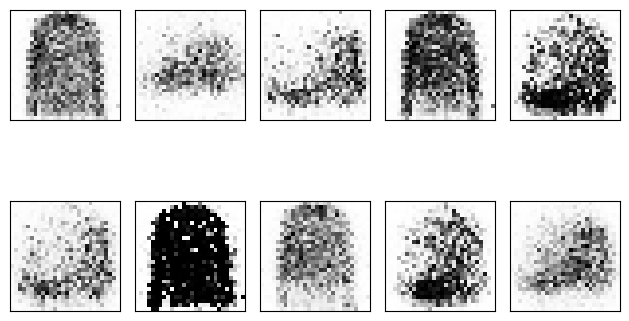

2024-06-07 03:23:19.390105: W tensorflow/core/data/root_dataset.cc:163] Optimization loop failed: CANCELLED: Operation was cancelled


epoch = 2/20, d_loss=0.670, d_g_loss=0.857                                                                                                                      


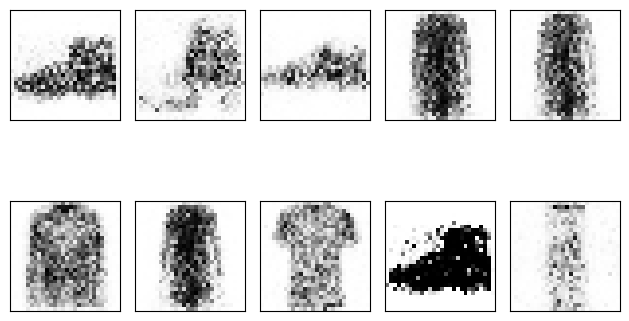

epoch = 3/20, d_loss=0.707, d_g_loss=0.820                                                                                                                      


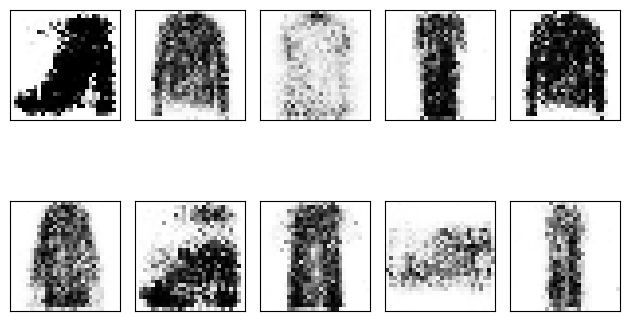

epoch = 4/20, d_loss=0.695, d_g_loss=0.777                                                                                                                      


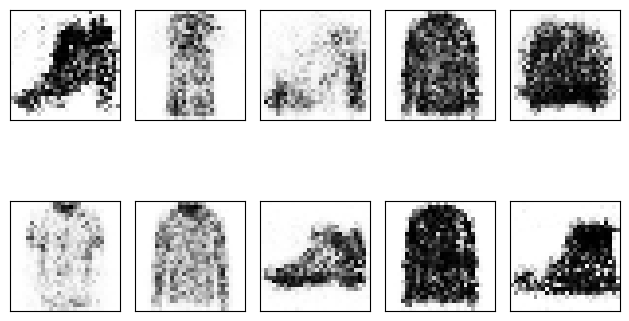

epoch = 5/20, d_loss=0.695, d_g_loss=0.770                                                                                                                      


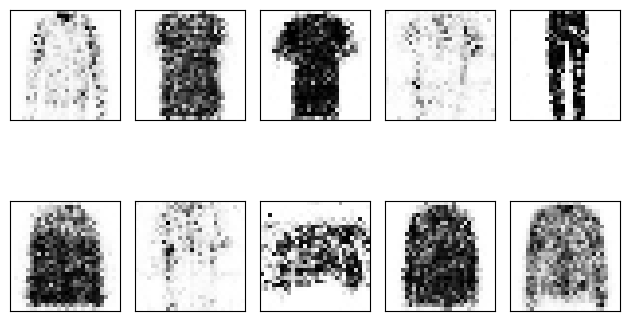

epoch = 6/20, d_loss=0.683, d_g_loss=0.752                                                                                                                      


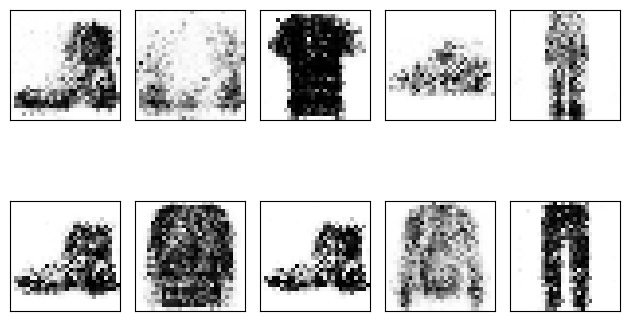

epoch = 7/20, d_loss=0.700, d_g_loss=0.740                                                                                                                      


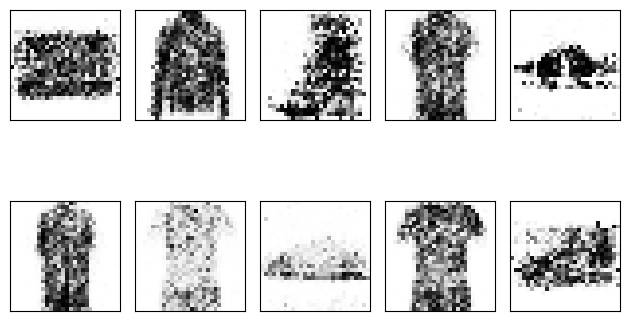

epoch = 8/20, d_loss=0.675, d_g_loss=0.754                                                                                                                      


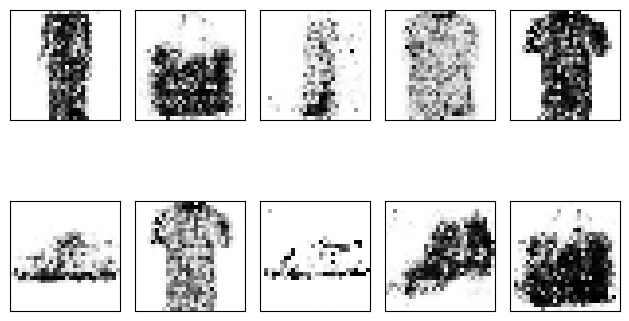

epoch = 9/20, d_loss=0.684, d_g_loss=0.752                                                                                                                      


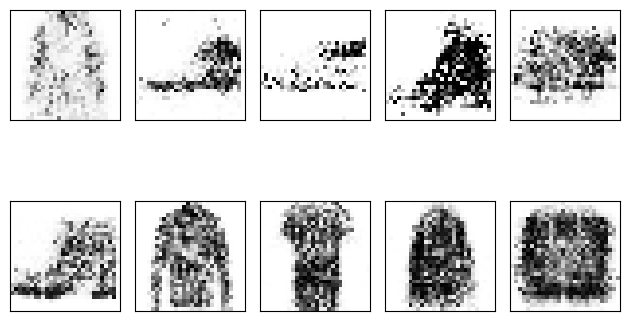

epoch = 10/20, d_loss=0.686, d_g_loss=0.740                                                                                                                      


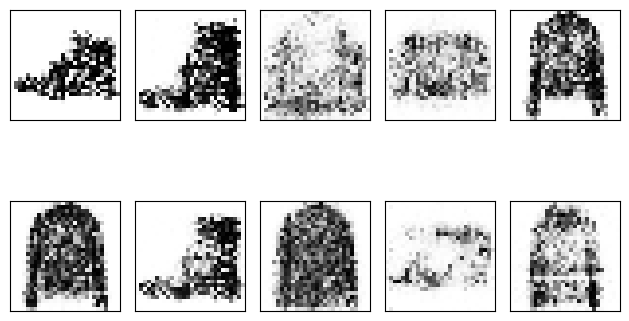

epoch = 11/20, d_loss=0.676, d_g_loss=0.755                                                                                                                      


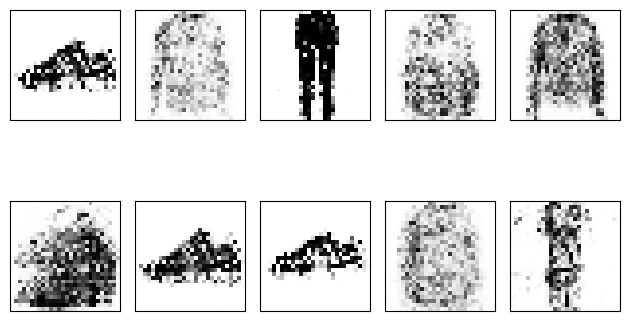

2024-06-07 03:31:25.064949: W tensorflow/core/data/root_dataset.cc:163] Optimization loop failed: CANCELLED: Operation was cancelled


epoch = 12/20, d_loss=0.675, d_g_loss=0.760                                                                                                                      


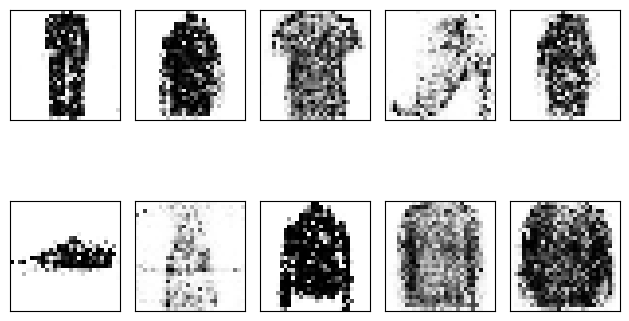

epoch = 13/20, d_loss=0.681, d_g_loss=0.743                                                                                                                      


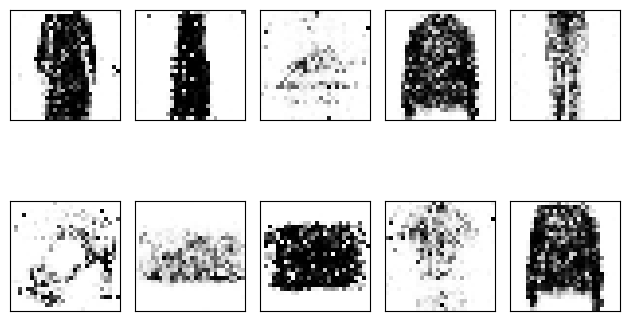

epoch = 14/20, d_loss=0.683, d_g_loss=0.754                                                                                                                      


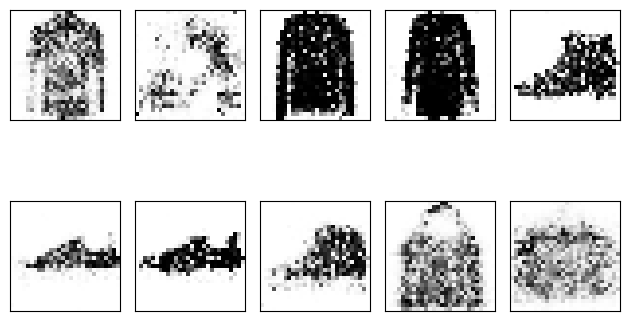

epoch = 15/20, d_loss=0.683, d_g_loss=0.771                                                                                                                      


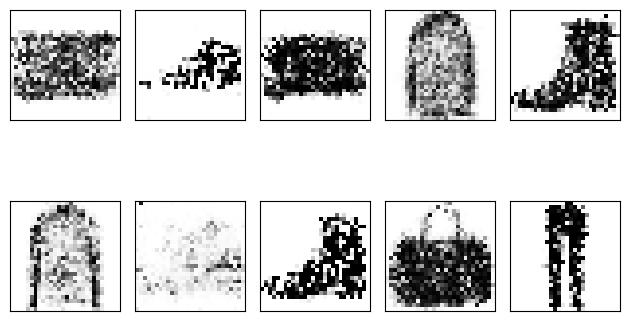

epoch = 16/20, d_loss=0.688, d_g_loss=0.719                                                                                                                      


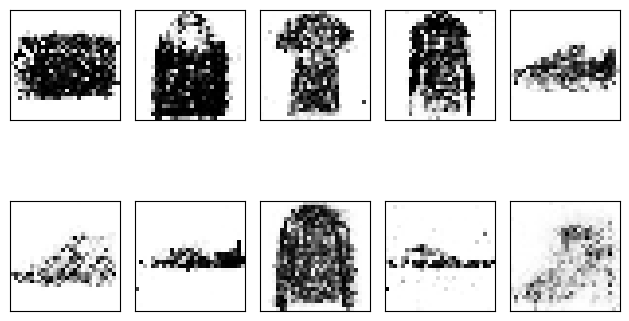

epoch = 17/20, d_loss=0.677, d_g_loss=0.766                                                                                                                      


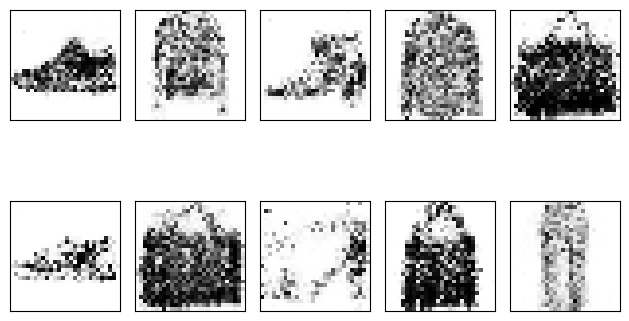

epoch = 18/20, d_loss=0.688, d_g_loss=0.748                                                                                                                      


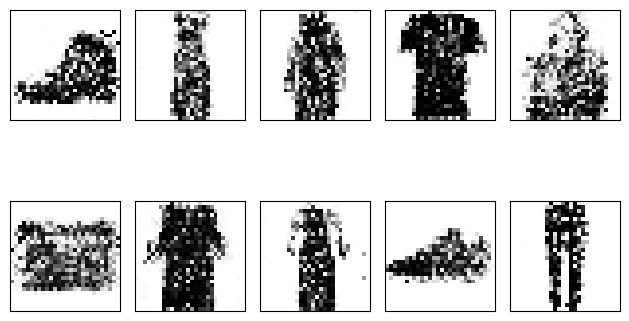

epoch = 19/20, d_loss=0.692, d_g_loss=0.761                                                                                                                      


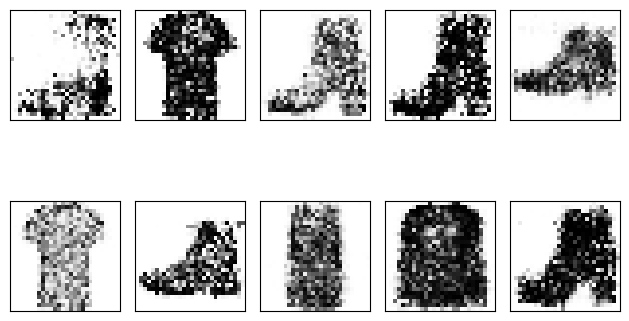

epoch = 20/20, d_loss=0.678, d_g_loss=0.757                                                                                                                      


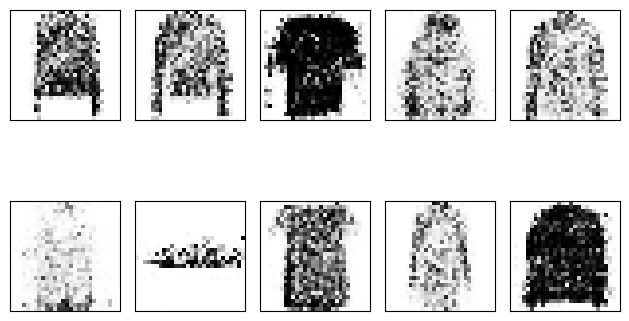

In [10]:
epochs = 20
batch_size = 64

real = np.ones(shape=(batch_size, 1))
fake = np.zeros(shape=(batch_size, 1))

d_loss = []
d_g_loss = []


for e in range(epochs):
    for i in range(len(X_train) // batch_size):

        ###############################################################
        # Train Discriminator weights
        discriminator.trainable = True

        # Real samples
        X_batch = X_train[i * batch_size : (i + 1) * batch_size]
        d_loss_real = discriminator.train_on_batch(x=X_batch, y=real)

        # Fake Samples
        z = np.random.normal(loc=0, scale=1, size=(batch_size, latent_dim))
        X_fake = generator.predict_on_batch(z)
        d_loss_fake = discriminator.train_on_batch(x=X_fake, y=fake)

        # Discriminator loss
        d_loss_batch = 0.5 * (d_loss_real[0] + d_loss_fake[0])

        ###############################################################
        # Train Generator weights
        discriminator.trainable = False
        d_g_loss_batch = d_g.train_on_batch(x=z, y=real)

        # Show learning process
        print(
            "epoch = %d/%d, batch = %d/%d, d_loss=%.3f, d_g_loss=%.3f"
            % (e + 1, epochs, i, len(X_train) // batch_size,
                d_loss_batch, d_g_loss_batch[0],
            ),
            100 * " ",
            end="\r",
        )

    d_loss.append(d_loss_batch)
    d_g_loss.append(d_g_loss_batch[0])
    print(
        "epoch = %d/%d, d_loss=%.3f, d_g_loss=%.3f"
        % (e + 1, epochs, d_loss[-1], d_g_loss[-1]),
        100 * " ",
    )

    # show sample generation after each epoch
    samples = 10
    x_fake = generator.predict(np.random.normal(loc=0, scale=1, size=(samples, latent_dim)))

    for k in range(samples):
        plt.subplot(2, 5, k + 1)
        plt.imshow(x_fake[k].reshape(28, 28), cmap="Greys")
        plt.xticks([])
        plt.yticks([])
        
    plt.tight_layout()
    plt.show()
